# Hexike Basis and Rotations
Below we go through a script for generating rotated and sheered basis over hexagonal apertures. Note `dLux` provides better tools for working with the James Webb Space Telecope primary aperture.

In [1]:
from layers import *
from matplotlib import pyplot

First we create the basis class with nil values for the rotations and sheers. As per the docstring `rmax` indicates the proportion of the pixel grid that we want to be covered by the aperture. 

Similarly `x` and `y` are proportional movements. Think of the question what proportion of the pixel grid do I want to move the basis. This is going to change in future versions where all user inputs will be in phyiscal units. 

In [4]:
hex_basis = JWSTPrimaryAperture(1008)

TypeError: list expected at most 1 argument, got 18

In [4]:
dir()

['ABC',
 'AnnularAperture',
 'Aperture',
 'Array',
 'Basis',
 'CompoundAperture',
 'HexagonalAperture',
 'In',
 'JWSTPrimaryAperture',
 'JWSTPrimaryApertureSegment',
 'JWST_PRIMARY_SEGMENTS',
 'Layer',
 'MAX_DIFF',
 'Matrix',
 'Out',
 'Tensor',
 'TypeVar',
 'Vector',
 '_',
 '__',
 '___',
 '__builtin__',
 '__builtins__',
 '__doc__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_dh',
 '_i',
 '_i1',
 '_i2',
 '_i3',
 '_i4',
 '_ih',
 '_ii',
 '_iii',
 '_oh',
 'abstractmethod',
 'cartesian_to_polar',
 'config',
 'eqx',
 'exit',
 'factorial',
 'functools',
 'get_ipython',
 'get_pixel_positions',
 'get_pixel_vector',
 'get_radial_positions',
 'jax',
 'np',
 'pyplot',
 'quit']

The `__call__` dunder method of the `HexagonalBasis` class is inherited from `Basis` and instantly applies the phase difference to a `Wavefront`. To independently get the basis we use the private `_basis` method. 

Compile time is lengthy and runtime is not ideal. To make the code `jit`-able and `grad`-able sacrifices were made regarding performance. Hopefully this will be fixed in future versions. 

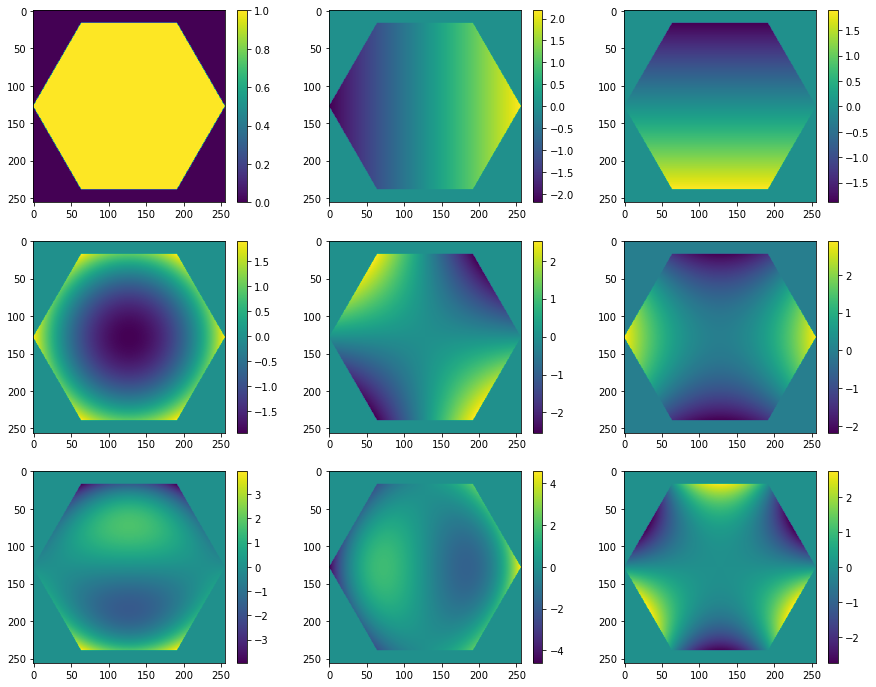

In [3]:
basis = hex_basis._basis()

figure = pyplot.figure(figsize=(15, 12))
for i in range(9):
    pyplot.subplot(3, 3, i + 1)
    pyplot.imshow(basis[i])
    pyplot.colorbar()

Now is where the magic happens. We may want to move the Basis vectors around and shrink them so that we may stack our basis into a 4 dimensional tensor with the shape `(nhex, nterms, npix, npix)` and multiply by a `(nterms, nhex)`  matrix of coefficients. 

We can either re-use the same instance or instantiate many. The advantage to re-use is that the `_basis` method is compiled. However, if this script is not dynamic and time is not an issue then multiple instances will save you time. 

Let's generate a very crude model of the JWST primary aperture basis. There are better ones currently in development.

In [75]:
basis = []
for i in range(6):
    basis.append(hex_basis\
        .set_magnification(0.2)\
        .set_x_offset(.35 * np.cos(i * np.pi / 3 + np.pi / 6))\
        .set_y_offset(.35 * np.sin(i * np.pi / 3 + np.pi / 6))\
        ._basis())

Unfortunately, you will need to pull out a piece of paper and do some derivations to work out the positions of the centres in normlised units. As I said this is getting removed in the newer version. 

Note that the magnification doubles as the distance from the centre of the hexagon to one of the vertices. 

In [76]:
X = [0.6, 0.6, 0.3, 0., -0.3, -0.6, -0.6, -0.6, -0.3, 0.0, 0.3, 0.6]
Y = [0., 0.35, 0.525, 0.7, 0.525, 0.35, 0, -0.35, -0.525, -0.7, -0.525, -0.35]

In [77]:
for i in range(12):
    basis.append(hex_basis\
        .set_magnification(0.2)\
        .set_x_offset(X[i])\
        .set_y_offset(Y[i])\
        ._basis())

In [78]:
b = np.stack(basis)

In [79]:
b = b.sum(axis=0)

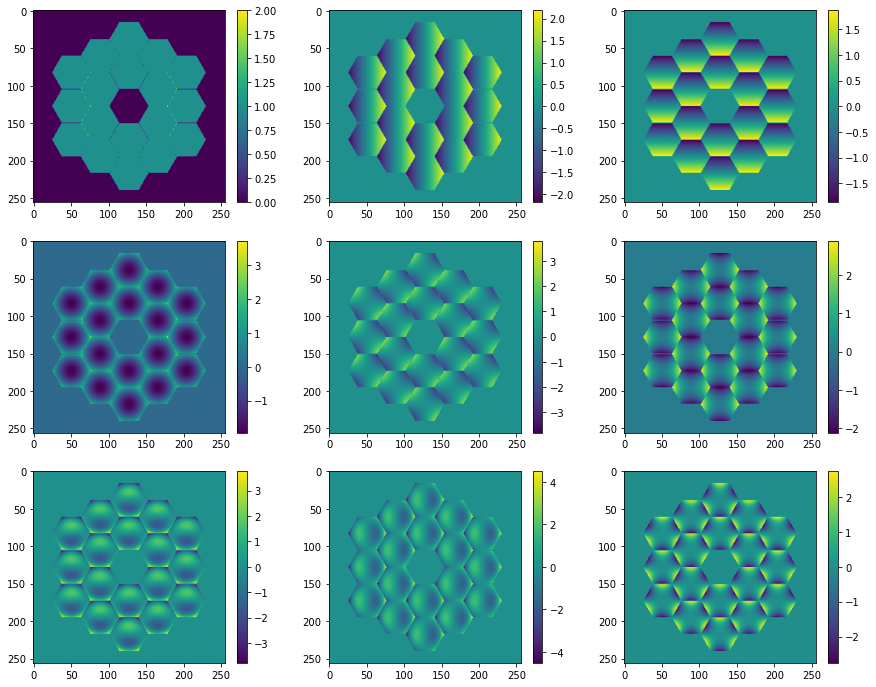

In [80]:
figure = pyplot.figure(figsize=(15, 12))
for i in range(9):
    pyplot.subplot(3, 3, i + 1)
    pyplot.imshow(b[i])
    pyplot.colorbar()